In [1]:
import sys
import json
import io
import numpy as np
import sklearn
import pandas as pd
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('../train.csv')


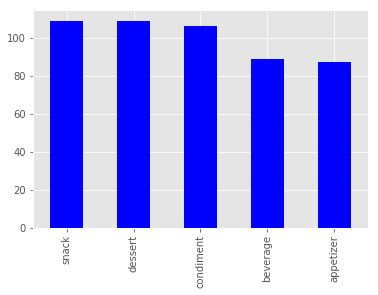

In [8]:
plt.style.use('ggplot')
train_data['category'].value_counts().plot(kind='bar')

In [16]:
df.shape

(745, 3)

In [32]:
import nltk
#a = set()
l = list()
for i in range(745):
    a = set()
    for i in df['text'][i][df['text'][i].index('[')+1:df['text'][i].index(']')].lower().split(','):
        i = i.replace(",","")
        i = i.replace("\n","")
        i = i.replace("\r","")
        i = i.replace("\"","")
        i = i.replace("\\","")
        i = i.replace("\t","")
        i = i.replace("(","")
        i = i.replace(")","")
        arr = ['oz','teaspoons','teaspoon', 'cup','cups','ounces','coarse','tablespoons','tablespoon','preserves','preserves','lb','boneless','skinless','ml','bottles','cubes','assorted','string','pieces','package','packages','slices','cans','can','food','ripe','free','medium','roll','chunks','bags','bag','inches','bottle','bottles','box','size']
        tagged_sentence = nltk.tag.pos_tag(i.split())
        edited_sentence = [word for word,tag in tagged_sentence if tag == 'NN' or tag == 'NNS' or tag == 'NNP' or tag=='NNPS']
        for words in edited_sentence:
            if words in arr:
                edited_sentence.remove(words)
            '''elif "™" or '®' in words:
                #print(words)
                edited_sentence.remove(words)'''
        for word in edited_sentence:
            a.add(word)
    l.append(a)
df['ingredients']=l

In [82]:
train_data = df[0:720]
test_data = df[720:745]

In [83]:
cv = CountVectorizer()
train_data['concat_ingredients'] = train_data['ingredients'].map(';'.join)
test_data['concat_ingredients'] = test_data['ingredients'].map(';'.join)
train_data.head()

/home/parth/miniconda3/envs/untitled/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/parth/miniconda3/envs/untitled/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,category,text,ingredients,concat_ingredients
0,1,snack,"""RecipeName"": "" Reese's™ Peanut Butter Layer B...","{semisweet, oil, chunk, package, butter, choco...",semisweet;oil;chunk;package;butter;chocolate;e...
1,2,dessert,"""RecipeName"": """"""""Just Bugging You"" Cupcake Co...","{oil, cake, moist™, candies, eggs, ice-cream, ...",oil;cake;moist™;candies;eggs;ice-cream;cookies...
2,3,dessert,"""RecipeName"": """"""Easy Fruit Crisp ""Dump"" Desse...","{cake, moist™, butter, filling, cherry, pineap...",cake;moist™;butter;filling;cherry;pineapple;cr...
3,4,snack,"""RecipeName"": ""3-Ingredient Crunchy Snack Mix""...","{butter-flavor, creme, chex™, cereal, wheat, j...",butter-flavor;creme;chex™;cereal;wheat;jar;pop...
4,5,condiment,"""RecipeName"": ""5-Minute Poppy Seed Dressing"",\...","{dressing, mayonnaise, sugar, vinegar, salad, ...",dressing;mayonnaise;sugar;vinegar;salad;seed


In [102]:
df2=pd.read_csv('../validation.csv')
import nltk
#a = set()
l = list()
for i in range(255):
    a = set()
    for i in df2['text'][i][df2['text'][i].index('[')+1:df2['text'][i].index(']')].lower().split(','):
        i = i.replace(",","")
        i = i.replace("\n","")
        i = i.replace("\r","")
        i = i.replace("\"","")
        i = i.replace("\\","")
        i = i.replace("\t","")
        i = i.replace("(","")
        i = i.replace(")","")
        arr = ['oz','teaspoons','teaspoon', 'cup','cups','ounces','coarse','tablespoons','tablespoon','preserves','preserves','lb','boneless','skinless','ml','bottles','cubes','assorted','string','pieces','package','packages','slices','cans','can','food','ripe','free','medium','roll','chunks','bags','bag','inches','bottle','bottles','box','size']
        tagged_sentence = nltk.tag.pos_tag(i.split())
        edited_sentence = [word for word,tag in tagged_sentence if tag == 'NN' or tag == 'NNS' or tag == 'NNP' or tag=='NNPS']
        for words in edited_sentence:
            if words in arr:
                edited_sentence.remove(words)
            '''elif "™" or '®' in words:
                #print(words)
                edited_sentence.remove(words)'''
        for word in edited_sentence:
            a.add(word)
    l.append(a)
df2['ingredients']=l

In [104]:
df2['concat_ingredients'] = df2['ingredients'].map(';'.join)
df2.head()

,Id,text,ingredients,concat_ingredients
0,746,"""RecipeName"": """"""Cinnamon ""Fried"" Ice Cream """"...","{vanilla, crunch™, cream, scoops, ice, cereal}",vanilla;crunch™;cream;scoops;ice;cereal
1,747,"""RecipeName"": ""“Devilicious” Eggs"",\r\n""Ingred...","{herbs, bell, pepper, paprika, mayonnaise, oli...",herbs;bell;pepper;paprika;mayonnaise;olives;dr...
2,748,"""RecipeName"": ""All Shook Up Chex Mix"",\r\n""Ing...","{crisply, butter, bacon, honey, chips, oz, che...",crisply;butter;bacon;honey;chips;oz;chex™;marg...
3,749,"""RecipeName"": ""Annie’s™ Yogurt Dirt Cups "",\r\...","{containers, grabbits™, yogurt, chocolate, mil...",containers;grabbits™;yogurt;chocolate;milk;fru...
4,750,"""RecipeName"": ""Antipasto Kabobs"",\r\n""Ingredie...","{oil, olives, cut, garlic, mozzarella, sugar, ...",oil;olives;cut;garlic;mozzarella;sugar;tomatoe...


In [105]:
X = cv.fit_transform(train_data['concat_ingredients'].values)
X_test = cv.transform(df2['concat_ingredients'].values)

In [106]:
id_test = df2['Id']
Y = train_data['category']
Y.head()

0        snack
1      dessert
2      dessert
3        snack
4    condiment
Name: category, dtype: object

In [86]:
NaiveModel = MultinomialNB().fit(X,Y)

In [87]:
Model1 = RandomForestClassifier(max_depth=40, n_estimators=20).fit(X,Y)

In [90]:
Model2 = SGDClassifier(loss='modified_huber', penalty='l2' , alpha=0.0001 , max_iter=100, tol=1e-3, random_state=65).fit(X,Y)

In [91]:
print("predicting")
Naive_PredictedY1s = NaiveModel.predict(X)
Random_PredictedY1s = Model1.predict(X)
SGD_PredictedY1s = Model2.predict(X)

predicting


In [92]:
print("Naive Bayes Accurracy : %f " % np.mean ( Naive_PredictedY1s == Y))
print("Random Forest Accurracy : %f " % np.mean ( Random_PredictedY1s == Y))
print("SGD classifier Accurracy : %f " % np.mean ( SGD_PredictedY1s == Y))

Naive Bayes Accurracy : 0.888889 
Random Forest Accurracy : 0.997222 
SGD classifier Accurracy : 0.987500 


In [93]:
print(classification_report(Naive_PredictedY1s, Y))

             precision    recall  f1-score   support

  appetizer       0.92      0.86      0.89       152
   beverage       0.93      0.90      0.91       143
  condiment       0.78      0.91      0.84       127
    dessert       0.95      0.85      0.90       162
      snack       0.87      0.95      0.91       136

avg / total       0.89      0.89      0.89       720



In [94]:
print(classification_report(Random_PredictedY1s, Y))

             precision    recall  f1-score   support

  appetizer       1.00      0.99      1.00       143
   beverage       1.00      1.00      1.00       137
  condiment       0.99      0.99      0.99       148
    dessert       0.99      1.00      1.00       143
      snack       1.00      1.00      1.00       149

avg / total       1.00      1.00      1.00       720



In [95]:
print(classification_report(SGD_PredictedY1s, Y))

             precision    recall  f1-score   support

  appetizer       1.00      1.00      1.00       142
   beverage       1.00      0.99      1.00       138
  condiment       0.97      0.98      0.98       147
    dessert       0.99      0.99      0.99       144
      snack       0.98      0.98      0.98       149

avg / total       0.99      0.99      0.99       720



In [107]:
Predicted_Cuisines = Model1.predict(X_test)

In [110]:
Predicted_Cuisines

array(['beverage', 'appetizer', 'snack', 'beverage', 'condiment', 'snack',
       'appetizer', 'appetizer', 'appetizer', 'appetizer', 'beverage',
       'condiment', 'dessert', 'appetizer', 'beverage', 'condiment',
       'beverage', 'condiment', 'dessert', 'beverage', 'condiment',
       'beverage', 'condiment', 'condiment', 'appetizer', 'dessert',
       'appetizer', 'beverage', 'appetizer', 'dessert', 'beverage',
       'appetizer', 'snack', 'dessert', 'snack', 'condiment', 'condiment',
       'condiment', 'dessert', 'appetizer', 'dessert', 'beverage',
       'condiment', 'appetizer', 'beverage', 'snack', 'snack', 'beverage',
       'appetizer', 'appetizer', 'condiment', 'beverage', 'condiment',
       'snack', 'snack', 'snack', 'snack', 'dessert', 'dessert',
       'dessert', 'snack', 'beverage', 'dessert', 'snack', 'condiment',
       'dessert', 'condiment', 'beverage', 'condiment', 'beverage',
       'condiment', 'condiment', 'dessert', 'beverage', 'condiment',
       'condiment'

In [111]:
print(len(id_test))
print(len(Predicted_Cuisines))

255
255


In [112]:
df3 = pd.DataFrame(columns=['id','category'])

In [113]:
df3['id'] = id_test
df3['category'] = Predicted_Cuisines

In [114]:
df3.head()

,id,category
0,746,beverage
1,747,appetizer
2,748,snack
3,749,beverage
4,750,condiment


In [115]:
df3.to_csv('STAGE2-CtrlAltElite.csv', index=False)

In [109]:
count = 0
for i in range(255):
    if test_data['category'][746+i] == Predicted_Cuisines[i]:
        count +=1
    else: print(746+i,test_data['category'][746+i],Predicted_Cuisines[i])
print(count)

KeyError: 746